#  Préparation des données pour construire un modèle



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=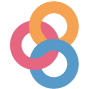)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/modelisation/0_preprocessing.ipynb)

Ce chapitre utilise le jeu de données présenté dans l'[introduction
de cette partie](https://linogaliana-teaching.netlify.app/modelisation/):
les données de vote aux élections présidentielles US
croisées à des variables socio-démographiques. Le code 
est disponible [sur Github](https://github.com/linogaliana/python-datascientist/blob/master/content/modelisation/get_data.py)
mais l'exercice 1 permet, à ceux qui le désirent, d'essayer de reproduire cela. 

Le guide utilisateur de `scikit` est une référence précieuse,
à consulter régulièrement. La partie sur le *preprocessing* est
disponible [ici](https://scikit-learn.org/stable/modules/preprocessing.html).

# Construction de la base de données

Les sources étant éclatées, le code pour construire une base combinant toutes ces
sources est directement fourni. Le travail de construction d'une base unique
est un peu fastidieux mais il s'agit d'un bon exercice, que vous pouvez tenter,
pour [réviser `pandas`](#pandas)   :

1. Télécharger et importer le shapefile [depuis ce lien](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
2. Exclure les Etats suivants: "02", "69", "66", "78", "60", "72", "15"
3. Importer les résultats des élections depuis [ce lien](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
4. Importer les bases disponibles sur le site de l'USDA en faisant attention à renommer les variables de code FIPS de manière identique
dans les 4 bases
5. *Merger* ces 4 bases dans une base unique de caractéristiques socio-économiques
6. *Merger* aux données électorales à partir du code FIPS
7. *Merger* au shapefile à partir du code FIPS. Faire attention aux 0 à gauche dans certains codes. Il est
recommandé d'utiliser la méthode `str.lstrip` pour les retirer
8. Importer les données des élections 2000 à 2016 à partir du [MIT Election Lab](https://electionlab.mit.edu/data)?
Les données peuvent être directement requêtées depuis l'url
<https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
9. Créer une variable `share` comptabilisant la part des votes pour chaque candidat. 
Ne garder que les colonnes `"year", "FIPS", "party", "candidatevotes", "share"`
10. Faire une conversion `long` to `wide` avec la méthode `pivot_table` pour garder une ligne
par comté x année avec en colonnes les résultats de chaque candidat dans cet état.
11. Merger à partir du code FIPS au reste de la base. 


La carte choropleth suivante permet de visualiser rapidement les résultats
(l'Alaska et Hawaï ont été exclus). 



Les cartes choropleth peuvent donner une impression fallacieuse ayant servi 
de justification pour contester les résultats du vote. 
Le [GIF "Land does not vote, people do"](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF)
qui avait eu un certain succès en 2020 propose un autre mode de visualisation.
En tenant compte de la population,
on obtient la carte suivante:












## Explorer la structure des données

La première étape nécessaire à suivre avant de modéliser est de déterminer les variables à inclure dans le modèle. Les fonctionalités de `pandas` sont, à ce niveau, suffisantes pour explorer des structures simples. Néanmoins, lorsqu'on est face à un jeu de données présentant de nombreuses variables explicatives (*features* en machine learning, *covariates* en économétrie), il est souvent judicieux d'avoir une première étape de sélection de variable, ce que nous verrons par la suite [**LIEN**]  

Avant d'être en mesure de sélectionner le meilleur ensemble de variables explicatives, nous allons prendre un nombre restreint et arbitraire de variables. La première tâche est de représenter les relations entre les données, notamment leur relation à la variable que l'on va chercher à expliquer (le score du parti républicain) ainsi que les relations entre les variables ayant vocation à expliquer la variable dépendante. 

```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: "['winner'] not in index"
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/geopandas/geodataframe.py", line 1299, in __getitem__
##     result = super(GeoDataFrame, self).__getitem__(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/frame.py", line 3461, in __getitem__
##     indexer = self.loc._get_listlike_indexer(key, axis=1)[1]
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1314, in _get_listlike_indexer
##     self._validate_read_indexer(keyarr, indexer, axis)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexing.py", line 1377, in _validate_read_indexer
##     raise KeyError(f"{not_found} not in index")
```

Créer un DataFrame plus petit avec les variables `winner` et `unemployment`, `median_age`, `asian`, `black`, `white_not_latino_population`,`latino_population`, `gini_coefficient`, `less_than_high_school`, `adult_obesity`, `median_earnings_2010_dollars` et ensuite :

1. Représenter une matrice de corrélation graphique
1. Choisir quelques variables (pas plus de 4 ou 5) et représenter une matrice de nuages de points
2. (optionnel) Refaire ces figures avec `plotly`

La matrice de corrélation construite avec `seaborn` aura l'aspect suivant:



Il serait également possible de la construire directement à partir de `pandas`
donne, avec les fonctionalités de `pandas`.


En ce qui concerne, la matrice de nuage de point :



`plotly` offre également la possibilité de faire une matrice de corrélation. 
Cela donnera un résultat proche de celui-ci:


Avec `plotly`, le résultat devrait ressembler au graphique suivant:





## Transformer les données

Les différences d'échelle ou de distribution entre les variables peuvent 
diverger des hypothèses sous-jacentes dans les modèles. Par exemple, dans le cadre
de la régression linéaire, les variables catégorielles ne sont pas traitées à la même
enseigne que les variables ayant valeur dans $\mathbb{R}$. Il est ainsi 
souvent nécessaire d'appliquer des tâches de *preprocessing*, c'est-à-dire 
des tâches de modification de la distribution des données pour les rendre
cohérentes avec les hypothèses des modèles.

### Standardisation

La standardisation consiste à transformer des données pour que la distribution empirique suive une loi $\mathcal{N}(0,1)$. Pour être performants, la plupart des modèles de machine learning nécessitent d'avoir des données dans cette distribution. 

Pour un statisticien, le terme `normalization` dans le vocable `scikit` peut avoir un sens contre-intuitif. On s'attendrait à ce que la normalisation consiste à transformer une variable de manière à ce que $X \sim \mathcal{N}(0,1)$. C'est, en fait, la **standardisation** en `scikit`. 

La **normalisation** consiste à modifier les données de manière à avoir une norme unitaire. La raison est expliquée plus bas

1. Standardiser la variable `Median_Household_Income_2019` (ne pas écraser les valeurs !) et regarder l'histogramme avant/après normalisation
2. Créer `scaler`, un `Transformer` que vous construisez sur les 1000 premières lignes de votre DataFrame. Vérifier la moyenne et l'écart-type de chaque colonne sur ces mêmes observations.
3. Appliquer `scaler` sur les autres lignes du DataFrame et comparer les distributions obtenues de la variable `Median_Household_Income_2019`.

La standardisation permet d'obtenir la modification suivante de la distribution:



On obtient bien une distribution centrée à zéro et on pourrait vérifier que la variance empirique soit bien égale à 1. On pourrait aussi vérifier que ceci est vrai également quand on transforme plusieurs colonnes à la fois

```
## Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: could not convert string to float: 'Worth County'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_data.py", line 667, in fit
##     return self.partial_fit(X, y)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_data.py", line 696, in partial_fit
##     X = self._validate_data(X, accept_sparse=('csr', 'csc'),
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/base.py", line 420, in _validate_data
##     X = check_array(X, **check_params)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/utils/validation.py", line 72, in inner_f
##     return f(**kwargs)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/utils/validation.py", line 598, in check_array
##     array = np.asarray(array, order=order, dtype=dtype)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/generic.py", line 1993, in __array__
##     return np.asarray(self._values, dtype=dtype)
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

```
## Moyenne de chaque variable sur 1000 premières observations
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

```
## Ecart-type de chaque variable sur 1000 premières observations
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Les paramètres qui seront utilisés pour une standardisation ultérieure
sont stockés dans les attributs `.mean_` et `.scale_`


In [ ]:
scaler.mean_

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
scaler.scale_

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scaler' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

Une fois appliqués à un autre `DataFrame`, on peut remarquer que la distribution
n'est pas exactement centrée-réduite dans le `DataFrame` sur lequel les
paramètres n'ont pas été estimés.
C'est normal, l'échantillon initial n'était pas aléatoire,
les moyennes et variances de cet échantillon n'ont pas de raison de
coïncider avec les moments de l'échantillon complet. 





### Normalisation

La **normalisation** est l'action de transformer les données de manière à obtenir une norme ($\mathcal{l}_1$ ou $\mathcal{l}_2$) unitaire. Autrement dit, avec la norme adéquate, la somme des éléments est égale à 1. Par défaut, la norme est dans $\mathcal{l}_2$. Cette transformation est particulièrement utilisée en classification de texte ou pour effectuer du *clustering*

1. Normaliser la variable `median_earnings_2010_dollars` (ne pas écraser les valeurs !) et regarder l'histogramme avant/après normalisation
2. Vérifier que la norme $\mathcal{l}_2$ est bien égale à 1.




` preprocessing.Normalizer` n'accepte pas les valeurs manquantes, alors que `preprocessing.StandardScaler()` s'en accomode (dans la version `0.22` de scikit). Pour pouvoir aisément appliquer le *normalizer*, il faut

* retirer les valeurs manquantes du DataFrame avec la méthode `dropna`: `df.dropna(how = "any")`;
* ou les imputer avec un modèle adéquat. `scikit` permet de le faire ([info](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)) 

### Encodage des valeurs catégorielles

Les données catégorielles doivent être recodées sous forme de valeurs numériques pour être intégrables dans le cadre d'un modèle. Cela peut être fait de plusieurs manières:

* `LabelEncoder`: transforme un vecteur `["a","b","c"]` en vecteur numérique `[0,1,2]`. Cette approche a l'inconvénient d'introduire un ordre dans les modalités, ce qui n'est pas toujours désiré
* `pandas.get_dummies` effectue une opération de *dummy expansion*. Un vecteur de taille *n* avec *K* catégories sera transformé en matrice de taille $n \times K$ pour lequel chaque colonne sera une variable *dummy* pour la modalité *k*. Il y a ici $K$ modalité, il y a donc multicollinéarité. Avec une régression linéaire avec constante, il convient de retirer une modalité avant l'estimation.
* `OrdinalEncoder`: une version généralisée du `LabelEncoder`. `OrdinalEncoder` a vocation à s'appliquer sur des matrices ($X$), alors que `LabelEncoder` est plutôt pour un vecteur ($y$)
* `OneHotEncoder`: une version généralisée (et optimisée) de la *dummy expansion*. Il a plutôt vocation à s'appliquer sur les *features* ($X$) du modèle

Prendra les variables `state_name` et `county_name` dans `votes`
1. Appliquer à `state_name` un `LabelEncoder`
2. Regarder la *dummy expansion* de `state_name`
3. Appliquer un `OrdinalEncoder` à `df[['state_name', 'county_name']]` ainsi qu'un `OneHotEncoder`

Le résultat du *label encoding* est relativement intuitif, notamment quand on le met en relation avec le vecteur initial

```
## array([[23, 'Missouri'],
##        [25, 'Nebraska'],
##        [30, 'New York'],
##        ...,
##        [41, 'Texas'],
##        [41, 'Texas'],
##        [41, 'Texas']], dtype=object)
```

L'expansion par variables dichotomiques également:

```
##       Alabama  Arizona  Arkansas  ...  West Virginia  Wisconsin  Wyoming
## 0           0        0         0  ...              0          0        0
## 1           0        0         0  ...              0          0        0
## 2           0        0         0  ...              0          0        0
## 3           0        0         0  ...              0          0        0
## 4           0        0         0  ...              0          0        0
## ...       ...      ...       ...  ...            ...        ...      ...
## 3103        0        0         0  ...              0          0        0
## 3104        0        0         0  ...              0          0        0
## 3105        0        0         0  ...              0          0        0
## 3106        0        0         0  ...              0          0        0
## 3107        0        0         0  ...              0          0        0
## 
## [3108 rows x 49 columns]
```

Le résultat du *ordinal encoding* est cohérent avec celui du *label encoding*:



```
## array([23., 25., 30., ..., 41., 41., 41.])
## 
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:104: DeprecationWarning:
## 
## `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
## Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
## 
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:105: DeprecationWarning:
## 
## `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
## Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
```

Enfin, on peut noter que `scikit` optimise l'objet nécessaire pour stocker le résultat d'un modèle de transformation. Par exemple, le résultat de l'encoding *One Hot* est un objet très volumineux. Dans ce cas, scikit utilise une matrice *Sparse*:



```
## <3108x1892 sparse matrix of type '<class 'numpy.float64'>'
## 	with 6216 stored elements in Compressed Sparse Row format>
## 
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:104: DeprecationWarning:
## 
## `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
## Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
## 
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:105: DeprecationWarning:
## 
## `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
## Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
## 
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:459: DeprecationWarning:
## 
## `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
## Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
```

